### Linear Regression
Linear regression is a fundamental statistical technique used to model and analyze the relationships between a dependent variable and one or more independent variables. The goal of linear regression is to find the linear relationship between the variables, which can be used to predict the value of the dependent variable based on the values of the independent variables.
### Key Concepts
1. Dependent Variable (Y): The outcome or the variable we are trying to predict or explain.
2. Independent Variable (X): The variable(s) used to predict or explain the dependent variable.
3. Linear Relationship: The relationship between the dependent and independent variables can be expressed as a straight line.
4. Regression Line: The best-fit line through the data points that minimizes the sum of the squared differences between the observed values and the predicted values.
### Simple Linear Regression
Simple linear regression involves a single independent variable. The model can be represented as:
Y = β0 + β1 X + ε
- Y is the dependent variable.
- X is the independent variable.
- β0 is the y-intercept.
- β1 is the slope of the regression line.
- ε is the error term.
### Multiple Linear Regression
Multiple linear regression involves more than one independent variable. The model can be represented as:
Y = β0 + β1 X1 + β2 X2 + ... + βn Xn + ε
- Y is the dependent variable.
- X1, X2, ..., Xn are the independent variables.
- β0 is the y-intercept.
- β1, β2, ..., βn are the coefficients of the independent variables.
- ε is the error term.
### Assumptions of Linear Regression
1. Linearity: The relationship between the dependent and independent variables is linear.
2. Independence: The residuals (errors) are independent.
3. Homoscedasticity: The residuals have constant variance at every level of the independent variable.
4. Normality: The residuals of the model are normally distributed.
### Steps in Performing Linear Regression
1. Data Collection: Gather the data for the dependent and independent variables.
2. Data Preprocessing: Clean and preprocess the data, handle missing values, and encode categorical variables if necessary.
3. Model Fitting: Use statistical software or programming languages (like Python or R) to fit the linear regression model to the data.
4. Model Evaluation: Evaluate the model's performance using metrics such as R-squared, Mean Squared Error (MSE), and residual analysis.
5. Prediction: Use the model to make predictions on new data.
Example in Python
Here's an example of how to perform simple linear regression in Python using the scikit-learn library:



In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

%matplotlib inline

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/chandanverma07/DataSets/master/weight-height.csv")

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0, 0.5, 'Weight')

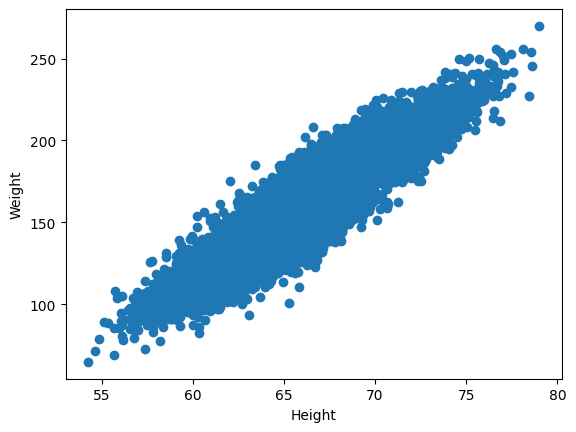

In [8]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [11]:
df[['Height','Weight']].corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


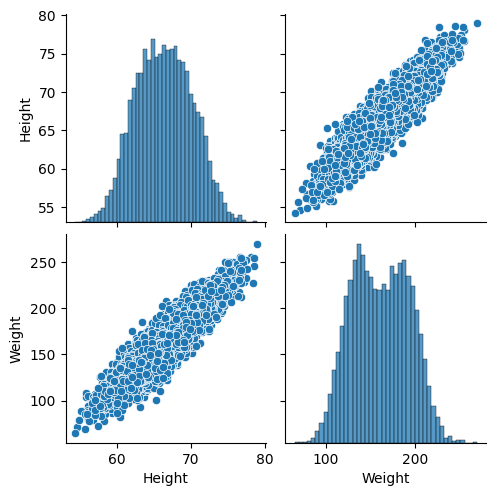

In [13]:
sns.pairplot(df)

In [21]:
X = df[['Weight']]
y = df['Height']

In [22]:
np.array(X).shape

(10000, 1)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

In [36]:
regression = LinearRegression(n_jobs=-1)

In [37]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [39]:
regression.coef_

array([3.5520765])

In [40]:
regression.intercept_

66.34834766149207

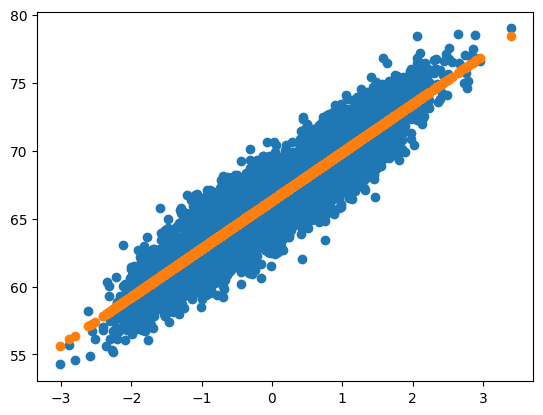

In [41]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train))

In [42]:
y_pred = regression.predict(X_test)

In [46]:
mse =  mean_squared_error(y_test,y_pred)
mae =  mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [47]:
print(mse)
print(mae)
print(rmse)

2.124500293128046
1.16186862410503
1.457566565590761


In [52]:
score = r2_score(y_test,y_pred)
print(score)

0.857428881104187


In [59]:
model = sm.OLS(y_train,X_train).fit()

In [60]:
prediction = model.predict(X_test)

In [63]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Sat, 29 Jun 2024   Prob (F-statistic):                    3.63e-06
Time:                        00:20:25   Log-Likelihood:                         -42106.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [65]:
regression.predict([[72]])

array([322.09785593])

In [66]:
regression.predict(scaler.transform([[72]]))

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([56.45016021])